# DORY. An exploration of barge movements on Western-Europe waterways

Western-Europe has a broad river delta reaching from the shores off the Netherlands and Belgium through Germany and France to the mountains of Zwitserland. This river delta is used as a blue road for the transport of many types of goods like general goods in containers, commodities, cars, oil, mineral and gas. Although the barge is a slower transportation method than a truck or train, the amounts tranported per barge, CO2 emissions per litre, the connection with deepsea transport and the reliablity of infrastructure are all excellent arguments for shippers to choose the barge as transportation type. 

In this study we'll dive into location data of barges to explore the speeds of barges. This information could be used to enhance estimations of arrival times which contributes to the reliability and therefore reputation of the transportation type.

## Data
For the data three different datasources are used:
1. General barge data in csv file
2. General location data in csv file
3. Position data of barges in csv file

The data is offered by a anominous barge operator. A barge operator is a party responsible for collection and distrubition cargo on barges.

## Methods

### Wrangling
There isn't any need for gathering the information, but steps towards cleaning is necessary. A visual and programmatic assessment has to be done before cleaning the data.

### Visualization
After wrangling the data will be explored and explained by three types of visualization:

1. Univariate plots
2. Bivariate plots
3. Multivariate plits



In [1]:
cd \users\frank\jupyter notebook\logistics\data

C:\users\frank\jupyter notebook\logistics\data


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
clog = pd.read_csv('cleanshiplog.csv')
location = pd.read_csv('Locations.csv')
ships = pd.read_csv('Ships.csv')

## Data about barge postions
The data is collected from barges that transport oil and minerals in the month April of the year 2020.  

### Explanation data
An explanation of the data. Barges are equiped with positioning software that sends a signal every minute. Depending on the strenght of the network on the location the signal is received or not by the barge operator. 

ShipId - identifier of the database for barges

Speed - traveling speed of the barge in km/ph

Course - cours of the barge in degrees (0 - 360)

Location - location of the barge at the moment of receiving the signal

In [4]:
clog.shape

(884171, 4)

In [5]:
clog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884171 entries, 0 to 884170
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ShipId    884171 non-null  float64
 1   Speed     884171 non-null  float64
 2   Course    884171 non-null  float64
 3   Location  884171 non-null  object 
dtypes: float64(3), object(1)
memory usage: 27.0+ MB


## Visual assessment
Visual assessment is done throug randomly looking throug multiple samples of 25 rows.

In [6]:
clog.sample(25)

,ShipId,Speed,Course,Location
364119,138.0,13.3,289.0,Amsterdam Rijnkanaal Tiel - Utrecht
286670,1212.0,9.1,155.9,Rijn Düsseldorf - Leverkusen
404392,833.0,0.0,0.0,Antwerpen
697104,1204.0,0.0,42.5,Julianakanaal Roermond - Maastricht
456422,844.0,3.7,315.4,Hamburg
266928,724.0,0.2,248.0,Schelde Antwerpen - Gent
771466,117.0,0.0,999.9,Gorinchem
21912,1058.0,0.0,0.0,Dortmund
236884,117.0,0.0,999.9,Gorinchem
453081,1197.0,0.0,192.1,Amsterdam Het IJ


* Course seems to be over 360 degrees in some cases. This can't be the case and seems to be inaccurate data.
* ShipId seems to be a float but should be an object because it isn't going to be used of mathematical purposes

## Programmatic assessement

In [7]:
clog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884171 entries, 0 to 884170
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ShipId    884171 non-null  float64
 1   Speed     884171 non-null  float64
 2   Course    884171 non-null  float64
 3   Location  884171 non-null  object 
dtypes: float64(3), object(1)
memory usage: 27.0+ MB


The shipId is a float, and should be an objeact. Other colomns seem to have correct types. There don't seem to be null values. 

In [8]:
clog[clog['Course'] > 360].count()[2]/clog.shape[0] * 100

18.887862189553832

In 18% of the cases the course seems inaccurate. These should be deleted.

In [9]:
clog.describe()

,ShipId,Speed,Course
count,884171.000000,884171.000000,884171.000000
mean,932.455703,3.735874,304.051763
std,301.847277,6.548932,351.786508
min,117.000000,0.000000,0.000000
25%,833.000000,0.000000,46.900000
50%,1055.000000,0.000000,185.300000
75%,1200.000000,8.000000,321.000000
max,1212.000000,189.500000,999.900000


The ship speed seems to have unlikely results. 

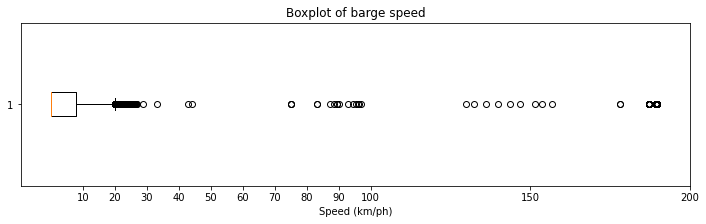

In [10]:
# Create horizontal figure for a readable figure
plt.figure(figsize=[12,3])

# Create horizontal boxplot and clear x ticks, knowing the results will be spread out
plt.boxplot(clog['Speed'], vert = False)
x_ticks = [10,20,30,40,50,60,70,80,90,100,150,200]
plt.xticks (x_ticks)

plt.xlabel('Speed (km/ph)')
plt.title('Boxplot of barge speed');

it seems like most values are underneath 30 km/ph. It save to say we can cut the result on that limit.b

## Conclusion


The data already seemss tidy, but for the quality of the data there's room for improvement:

* Inaccurate data: 18.8% of the course information is inaccurate
* Inaccurate data: It appears that the maximum speed of barge is under the 30 km/ph, but there are some outliers.
* ShipId could be a string, but should be an integer for space saving and performance reasons <a href="https://stackoverflow.com/questions/2551776/database-design-primay-key-id-vs-string">(source)</a>, but can't be a float. 

## Data about locations
The data is collected from location information about inland waterways in the month April of the year 2020. 

## Explanation about the data
Locations are marked water ways locations where barge sail. This could be a water way, port, terminal, etc. This data was collected by the use of multiple sources about inland water way shipping. The data consist of the following data:

id - primary key of object in database

code - terminal are identified by a combination of an <a href="https://www.unece.org/cefact/locode/service/location">un/locode</a> and a <a href=https://www.bics.nl/?q=en>bics</a> code
desciption - name of location

type - location can be one of eight types. 1) Terminal, 2) address, 3) Lock, 4) Port, 5) waiting location, 12) area, 13) bunker station, 14) water way

latitude - latitude is a geographic coordinate that specifies the north–south position of a point on the Earth's surface (<a href=https://en.wikipedia.org/wiki/Latitude>source</a>). 

langitude - langitude is a geographic coordinate that specifies the east–west position of a point on the Earth's surface (<a href=https://en.wikipedia.org/wiki/Longitude>source</a>).

encodePolyline - Polylines in Google Maps are formed as a set of latitude/longitude pairs. In addition, for each vertex (location) in an encoded polyline, a level can be specified indicating that the location should appear on that level and any level higher (<a href=https://developers.google.com/maps/documentation/utilities/polylineutility>source</a>).


In [11]:
location.shape

(3021, 7)

In [12]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3021 non-null   int64  
 1   code             2402 non-null   object 
 2   description      3021 non-null   object 
 3   type             3021 non-null   int64  
 4   latitude         2883 non-null   float64
 5   longitude        2883 non-null   float64
 6   encodedPolyline  1424 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 165.3+ KB


## Visual assessment
Visual assessment is done by randomly looking through multiple samples of 25 rows.

In [13]:
location.sample(25)

,id,code,description,type,latitude,longitude,encodedPolyline
348,802,Sluice_357,Chaillevois 7,3,49.498135,3.525475,NaN
1558,2026,KTS,Kootstertille - Haitsma,2,53.212661,6.100231,m}wcIsdfd@dAsBaKwScAtA
2246,2730,NaN,Amsterdam Ertshaven,4,52.375434,4.942979,}ut~Hsnc]zLqNs@kOcB}EsBu\kGxC|Al~@
1511,1978,HGM,Hillegom - Cementbouw,1,52.287269,4.588916,}mc~H}i_[|BvBTwA{BqB
1872,2356,HETER,Heteren,2,51.964947,5.749454,kge|H}dab@`^ylApM~MsCddA_g@yC
338,792,Sluice_347,Grand-Verly 17,3,49.945843,3.592409,NaN
1689,2173,HIA,Hendrik-Ido-Ambacht - Van der Waal,2,51.841014,4.658992,ell{Hu_m[EaBnIo@BzA
772,1226,Sluice_784,Saint-Martin 10,3,48.218341,3.265707,NaN
721,1175,Sluice_733,Pacy 83,3,47.783879,4.086667,NaN
2872,3386,NaN,Regensburg,4,49.024148,12.096806,avfjHejuhAqIse@vMasCjRi{G~jAslFv\{KtB~~A{gAdyJ...


some locations seem to be missing encodePolylines and other lat/long. We'll investigate further in programmatic assessment. 

Codes are missing for some locations, which shouldn't be a problem. Codes should only be an additional value for terminals or ports.

ID is a primary key which isn't relevant for this research and can be removed.

### Programmatic assessment

In [14]:
location[location['latitude'] == 0.0].count()

id                 10
code               10
description        10
type               10
latitude           10
longitude          10
encodedPolyline     3
dtype: int64

In [15]:
location[location['latitude'] == 0.0]

,id,code,description,type,latitude,longitude,encodedPolyline
2312,2826,BEANR00234,234 ACC / Impala (K234-236),1,0.0,0.0,ed|wH}aqYrMtWvLgUwMqY}K~T\r\n
2327,2841,BEANR00345,Katoennatie Terminals NV K345 (K345-363),1,0.0,0.0,sxwwHsnwYi@pkCqI?dAojCvFuA\r\n
2363,2877,BEANR01624,Medrepair S11 K1624,1,0.0,0.0,m{~wHkwyXbWr\vUw_AwOqZ\r\n
2389,2903,BEGNELYSLI,Lys-Line Belgium,1,0.0,0.0,NaN
2415,2929,CHBSL00HAN,Haniel Basel,1,0.0,0.0,NaN
2419,2933,CHBSL0SATR,Satram AG,1,0.0,0.0,NaN
2659,3173,NLRTM0NRBC,Ned. Repair Barce Centre,1,0.0,0.0,NaN
2674,3188,NLRTMECCMA,E.C.C. Madroelkade,1,0.0,0.0,NaN
2737,3251,TESTT12345,TEST LOCSERVICE,1,0.0,0.0,NaN
2738,3252,TST52TST52,Test voor inland terminal sync,1,0.0,0.0,NaN


Signals are matched to locations by encoded polylines. 0.0 values for locations aren't a problem and the amount won't influence the results of the data

Because the barge positions are based on the encoded polylines of the location data, all the location without encode polylines will be dropped when merging the data. Cleaning it isn't necessary, but does improve the quality.

### Conclusion

The location data is quite good besides a couple of points:

* Missing data: There're a lot of locations without encoded polylines
* Not every column is a variable: ID is a primary key which isn't relevant for this research and can be removed.
* Ever row is an observation: Change location type from numerical indication to catagorical indication and by doing so improve the observation

## Data about barges (ships)
Barges used for transporting oil and minerals are tankers. Data comes from an open sources databank about barges.

### Explanation 


In the data barges are named as catagorizd as ships. A barge is a specific type of ship for inland cargo transportation. The data is as follows:

- Id : primary key of object in database

- Name : Name of barge

- ENI : Europe identification number of barge (<a href="https://en.wikipedia.org/wiki/ENI_number">Sources</a>)

- MMSI  : Identification number for AIS signals (<a href="https://nl.wikipedia.org/wiki/Automatic_Identification_System">Source</a>)

- TypeId : Type indicates cargo carried on barge. 5) is a tanker, the barge type we're interested in.

- Classification : Barges are classified in different catagories depending on size, cargo and tonnage (<a href="https://www.bureauvoorlichtingbinnenvaart.nl/assets/files/Scheepstypen_2019_hr.pdf">Source</a>)

- CapacityTon : Amount of cargo that can be planned on a barge measured in ton, used for bulk cargo.

- CapacityTeu : Amount of containers that can be planned on a barge measured in <a href="https://en.wikipedia.org/wiki/Twenty-foot_equivalent_unit">TEU</a>, used for bulk cargo.

- lenghtCm : lenght of barge in cm. 

- widthCm : widht of barge in cm.

In [16]:
ships.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              136 non-null    int64  
 1   name            136 non-null    object 
 2   ENI             133 non-null    float64
 3   MMSI            136 non-null    int64  
 4   TypeId          129 non-null    float64
 5   classification  128 non-null    float64
 6   capacityTon     109 non-null    float64
 7   capacityTeu     0 non-null      float64
 8   lengthCm        128 non-null    float64
 9   widthCm         128 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 10.8+ KB


In [17]:
ships.shape

(136, 10)

### Visual assessment
Visual assessment is done by randomly looking through multiple samples of 25 rows.

In [18]:
ships.sample(25)

,id,name,ENI,MMSI,TypeId,classification,capacityTon,capacityTeu,lengthCm,widthCm
96,989,Chubasco,2324744.0,244660422,5.0,5.0,NaN,NaN,10850.0,1140.0
30,844,Convenant,2333235.0,244670865,5.0,5.0,4384.0,NaN,11000.0,1350.0
127,1200,Cotrans 2,3021429.0,244660605,2.0,1.0,900.0,NaN,7000.0,800.0
132,1208,Cotrans 3,2315519.0,244660606,2.0,1.0,1060.0,NaN,7300.0,740.0
22,836,Amistade,2332451.0,244650553,5.0,5.0,6580.0,NaN,13500.0,1508.0
101,994,Toba,2333754.0,244700594,5.0,5.0,NaN,NaN,14000.0,1140.0
121,1059,Malta,2335400.0,244700043,5.0,5.0,2865.0,NaN,11000.0,1150.0
13,787,Schip1,1.0,244020488,NaN,NaN,2750.0,NaN,10990.0,1145.0
12,785,Delta Hopper,12342678.0,12421453,2.0,1.0,1008.0,NaN,7000.0,750.0
15,828,Jeanine,2332323.0,222582345,5.0,5.0,6445.0,NaN,13500.0,1500.0


ENI of "ship 1" seems to be invalid. Probably a dummy vessel.<br>Some barges don't have a capacity, lenght or width.<br>
Some barges aren't tanker barges but other barges (typId 2) or don't have a typeId (NaN)<br>
Multiple columns seem to have incorrect type

TypeId should say Tanker. A number doesn't add value.<br>CapacityTeu and classification aren't relevant<br>barge could be catagorized based on lenght or square meters.<br>Barge dimensions are in Cm. Meters are beter suited. Column with catagories XS, S, M , L, XL could be better for analytics and created by calculating and catagorizing the square meters.

### Programmatic assessment

In [19]:
ships.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              136 non-null    int64  
 1   name            136 non-null    object 
 2   ENI             133 non-null    float64
 3   MMSI            136 non-null    int64  
 4   TypeId          129 non-null    float64
 5   classification  128 non-null    float64
 6   capacityTon     109 non-null    float64
 7   capacityTeu     0 non-null      float64
 8   lengthCm        128 non-null    float64
 9   widthCm         128 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 10.8+ KB


The following columns aren't tidy; don't have the corect type:

* ENI should be integer
* CapacityTon should be integer
* lenghtCm should be integer
* widthCm should be integer

In [20]:
ships['TypeId'].value_counts()

5.0    112
2.0     13
4.0      3
1.0      1
Name: TypeId, dtype: int64

In [21]:
ships.describe()

,id,ENI,MMSI,TypeId,classification,capacityTon,capacityTeu,lengthCm,widthCm
count,136.000000,1.330000e+02,1.360000e+02,129.000000,128.000000,109.000000,0.0,128.000000,128.000000
mean,933.941176,3.379475e+06,2.372050e+08,4.643411,4.570312,4025.715596,NaN,10818.507812,1171.164062
std,159.509887,3.271141e+06,3.740956e+07,0.966618,1.277816,4922.939426,NaN,2361.876266,235.633533
min,117.000000,1.000000e+00,9.328261e+06,1.000000,1.000000,98.000000,NaN,5500.000000,660.000000
25%,897.750000,2.326510e+06,2.446205e+08,5.000000,5.000000,1807.000000,NaN,8600.000000,1100.000000
50%,960.500000,2.333061e+06,2.446604e+08,5.000000,5.000000,3335.000000,NaN,11000.000000,1140.000000
75%,994.250000,2.335431e+06,2.447001e+08,5.000000,5.000000,4423.000000,NaN,12500.000000,1237.500000
max,1212.000000,2.734896e+07,4.777919e+08,5.000000,6.000000,50000.000000,NaN,18500.000000,1755.000000


Biggest inland tanker is 14700 cm in lenght and 2300 in width with a ton capacity of 12.000 ton <a href="https://nos.nl/artikel/241197-grootste-binnenschip-in-rotterdam-gedoopt.html#:~:text=2011%2C%2019%3A31-,Grootste%20binnenschip%20in%20Rotterdam%20gedoopt,was%20135%20meter%20het%20record">(Source)</a>. Seems like there is a larger barge in the database.

In [22]:
ships[ships['lengthCm'] >= 14700]

,id,name,ENI,MMSI,TypeId,classification,capacityTon,capacityTeu,lengthCm,widthCm
133,1210,Dolce Mare,2323957.0,244790251,4.0,6.0,50000.0,NaN,17200.0,1145.0
134,1211,Kruier,2327353.0,244650953,2.0,6.0,500.0,NaN,17200.0,1200.0
135,1212,Vrido I,2328232.0,244700661,5.0,6.0,5500.0,NaN,18500.0,1145.0


Vrido I only tanker larger than 14700 cm. Quick search shows that Vrido I is a container barge.

The Dolce Mare seems to have a ton capacity larger than the largest tanker barge, but is a container barge. Let's see if there are others.

In [23]:
ships[ships['capacityTon'] >= 12000]

,id,name,ENI,MMSI,TypeId,classification,capacityTon,capacityTeu,lengthCm,widthCm
133,1210,Dolce Mare,2323957.0,244790251,4.0,6.0,50000.0,NaN,17200.0,1145.0


In [24]:
ships[ships['TypeId'] != 5].count()[4]

17

17 bargers are not tankers

In [25]:
ships.duplicated().sum()

0

In [26]:
ships.isnull().sum()

id                  0
name                0
ENI                 3
MMSI                0
TypeId              7
classification      8
capacityTon        27
capacityTeu       136
lengthCm            8
widthCm             8
dtype: int64

TypeId,lengthCm,widthCm with null values aren't valuable.

### Conclusion

* Invalid data : Drop "ship 1"
* Inconsistent data : container or dry bulk barges aren't relevant for analysis
* Non valuable data : CapacityTEU and classification aren't valuable for analysis
* Accurate data : barges dimensions in meters
* Inaccurate data : ENI, CapacityTon, lenghtCm, widthCm should be integer
* Invalid data : Barges larger than 14700 cm aren't tankers
* inconsistent data : TypeId,lengthCm,widthCm with null values aren't valuable


## Cleaning

In [27]:
clog_copy = clog.copy()
location_copy = location.copy()

In [28]:
ships_copy = ships.copy()

### Define
Inaccurate data: 18.8% of the course information is inaccurate

> Drop all rows with course larger than 360

In [29]:
# Skim dataset to have only rows with course information less or equal to 360 degrees
clog_copy = clog_copy[clog_copy['Course'] <= 360]

In [30]:
# Count amount of rows with course higher than 360 degrees. Should be zero
clog_copy[clog_copy['Course'] > 360]['Course'].count()

0

### Define
Inaccurate data: It appears that the maximum speed of barge is under the 30 km/ph, but there are some outliers.

> Drop all rows with speeds above 30 km/ph

In [31]:
# Skim dataset to have only rows with speed information less or equal to 30 km/ph
clog_copy = clog_copy[clog_copy['Speed'] <= 30]

In [32]:
# Count amount of rows with speed higher than 30 km/ph. Should be zero
clog_copy[clog_copy['Speed'] >= 30]['Speed'].count()

0

### Define
ShipId could be a string, but should be an integer for space saving and performance reasons (source), but can't be a float.

> Give shipId type integer

In [33]:
clog_copy['ShipId'] = clog_copy['ShipId'].astype('int')

In [34]:
clog_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717070 entries, 0 to 884170
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ShipId    717070 non-null  int32  
 1   Speed     717070 non-null  float64
 2   Course    717070 non-null  float64
 3   Location  717070 non-null  object 
dtypes: float64(2), int32(1), object(1)
memory usage: 24.6+ MB


### Define
There're a lot of locations without encoded polylines

> Will be dropped during merge

In [35]:
location_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3021 non-null   int64  
 1   code             2402 non-null   object 
 2   description      3021 non-null   object 
 3   type             3021 non-null   int64  
 4   latitude         2883 non-null   float64
 5   longitude        2883 non-null   float64
 6   encodedPolyline  1424 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 165.3+ KB


### Define
Not every column is a variable: ID is a primary key which isn't relevant for this research and can be removed.

In [36]:
# Drop id column
location_copy = location_copy.drop(columns = ['id'])

In [37]:
# Test columns
location_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   code             2402 non-null   object 
 1   description      3021 non-null   object 
 2   type             3021 non-null   int64  
 3   latitude         2883 non-null   float64
 4   longitude        2883 non-null   float64
 5   encodedPolyline  1424 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 141.7+ KB


### Define
Ever row is an observation: Change location type from numerical indication to catagorical indication and by doing so improve the observation

In [38]:
location_copy['type'] = location_copy['type'].replace({1:'Terminal',2:'Address',3:'Lock',4:'Port',5:'Waiting location',12: 'Area',13: 'Bunker station', 14: 'Water way'})

In [39]:
location_copy['type'] = location_copy['type'].astype('category')

In [40]:
location_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3021 entries, 0 to 3020
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   code             2402 non-null   object  
 1   description      3021 non-null   object  
 2   type             3021 non-null   category
 3   latitude         2883 non-null   float64 
 4   longitude        2883 non-null   float64 
 5   encodedPolyline  1424 non-null   object  
dtypes: category(1), float64(2), object(3)
memory usage: 121.5+ KB


In [41]:
location_copy['type'].value_counts()

Lock                1488
Terminal             613
Address              317
Port                 216
Water way            193
Waiting location     176
Bunker station        17
Area                   1
Name: type, dtype: int64

### Define
"ship 1" seems to be an invalid barge

> Drop "schip1"

In [42]:
ships_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              136 non-null    int64  
 1   name            136 non-null    object 
 2   ENI             133 non-null    float64
 3   MMSI            136 non-null    int64  
 4   TypeId          129 non-null    float64
 5   classification  128 non-null    float64
 6   capacityTon     109 non-null    float64
 7   capacityTeu     0 non-null      float64
 8   lengthCm        128 non-null    float64
 9   widthCm         128 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 10.8+ KB


In [43]:
# drop schip1 from database
ships_copy = ships_copy[ships_copy['name'] != 'Schip1']

In [44]:
# shape should amount to 135 rows
ships_copy.shape

(135, 10)

### Define
container or dry bulk barges aren't relevant for analysis

> Keep only barges with TypeId 5

In [45]:
# Keep barges with TypeId 5
ships_copy = ships_copy[ships_copy['TypeId'] == 5]

In [46]:
# Amount of ships with TypeId different than 5 should zero
ships_copy[ships_copy['TypeId'] != 5].count()

id                0
name              0
ENI               0
MMSI              0
TypeId            0
classification    0
capacityTon       0
capacityTeu       0
lengthCm          0
widthCm           0
dtype: int64

### Define
CapacityTEU and classification aren't valuable for analysis

> Drop colums CapacityTEU and classification 

In [47]:
# Drop colums CapacityTEU and classification
ships_copy = ships_copy.drop(columns = ['capacityTeu','classification'])

In [48]:
# Check columns
ships_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 6 to 135
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           112 non-null    int64  
 1   name         112 non-null    object 
 2   ENI          112 non-null    float64
 3   MMSI         112 non-null    int64  
 4   TypeId       112 non-null    float64
 5   capacityTon  90 non-null     float64
 6   lengthCm     110 non-null    float64
 7   widthCm      110 non-null    float64
dtypes: float64(5), int64(2), object(1)
memory usage: 7.9+ KB


### Define¶
inconsistent data : TypeId,lengthCm,widthCm with null values aren't valuable

> Drop rows with NaN

In [49]:
ships_copy = ships_copy.dropna()

In [50]:
ships_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 6 to 135
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           90 non-null     int64  
 1   name         90 non-null     object 
 2   ENI          90 non-null     float64
 3   MMSI         90 non-null     int64  
 4   TypeId       90 non-null     float64
 5   capacityTon  90 non-null     float64
 6   lengthCm     90 non-null     float64
 7   widthCm      90 non-null     float64
dtypes: float64(5), int64(2), object(1)
memory usage: 6.3+ KB


### Define
ENI, CapacityTon, lenghtCm, widthCm should be integer

> Change data types

In [51]:
ships_copy['ENI'] = ships_copy['ENI'].astype('int')
ships_copy['capacityTon'] = ships_copy['capacityTon'].astype('int')
ships_copy['lengthCm'] = ships_copy['lengthCm'].astype('int')
ships_copy['widthCm'] = ships_copy['widthCm'].astype('int')

### Define
Invalid data : Barges larger than 14700 cm aren't tankers

In [52]:
ships_copy = ships_copy[ships_copy['lengthCm'] < 14700]

In [53]:
# amount barges larger than 14700 cm should be zero
ships_copy[ships_copy['lengthCm'] >= 14700]['id'].count()

0

### Define
incorrect data : Barges dimensions in meters

In [54]:
ships_copy['length_m'] = ships_copy['lengthCm'] / 100

In [55]:
ships_copy['width_m'] = ships_copy['widthCm'] / 100

In [56]:
ships_copy = ships_copy.drop(columns=['lengthCm','widthCm'])

In [57]:
# Check if barge dimensions are in meters
ships_copy.head()

,id,name,ENI,MMSI,TypeId,capacityTon,length_m,width_m
6,737,Willem Antonie,2331120,244650799,5.0,2912,99.0,11.45
14,827,Atlantic Performer,2333816,244710207,5.0,5718,135.0,13.50
15,828,Jeanine,2332323,222582345,5.0,6445,135.0,15.00
16,829,Promotion,2332837,244660052,5.0,8730,135.0,17.50
17,831,Jowi,2330211,244620628,5.0,6561,135.0,15.00


### Define
Tidy data : Because all barges are tankers, TypeId isn't relevant or variable

In [58]:
ships_copy = ships_copy.drop(columns=['TypeId'])

In [59]:
# Check if barge TypeId is dropped
ships_copy.head()

,id,name,ENI,MMSI,capacityTon,length_m,width_m
6,737,Willem Antonie,2331120,244650799,2912,99.0,11.45
14,827,Atlantic Performer,2333816,244710207,5718,135.0,13.50
15,828,Jeanine,2332323,222582345,6445,135.0,15.00
16,829,Promotion,2332837,244660052,8730,135.0,17.50
17,831,Jowi,2330211,244620628,6561,135.0,15.00


## Merge datasets

In [60]:
barges_joinstep = clog_copy.merge(location_copy, left_on=['Location'], right_on=['description'], how='inner')

In [61]:
barges_joinstep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855610 entries, 0 to 855609
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   ShipId           855610 non-null  int32   
 1   Speed            855610 non-null  float64 
 2   Course           855610 non-null  float64 
 3   Location         855610 non-null  object  
 4   code             247018 non-null  object  
 5   description      855610 non-null  object  
 6   type             855610 non-null  category
 7   latitude         621994 non-null  float64 
 8   longitude        621994 non-null  float64 
 9   encodedPolyline  780397 non-null  object  
dtypes: category(1), float64(4), int32(1), object(4)
memory usage: 62.8+ MB


In [62]:
barges_joinstep.shape

(855610, 10)

In [63]:
barges_join = barges_joinstep.merge(ships_copy,left_on=['ShipId'], right_on=['id'], how='inner')

In [64]:
barges_join.shape

(420796, 17)

### Visual analysis

In [65]:
barges_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420796 entries, 0 to 420795
Data columns (total 17 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   ShipId           420796 non-null  int32   
 1   Speed            420796 non-null  float64 
 2   Course           420796 non-null  float64 
 3   Location         420796 non-null  object  
 4   code             181408 non-null  object  
 5   description      420796 non-null  object  
 6   type             420796 non-null  category
 7   latitude         260324 non-null  float64 
 8   longitude        260324 non-null  float64 
 9   encodedPolyline  361753 non-null  object  
 10  id               420796 non-null  int64   
 11  name             420796 non-null  object  
 12  ENI              420796 non-null  int32   
 13  MMSI             420796 non-null  int64   
 14  capacityTon      420796 non-null  int32   
 15  length_m         420796 non-null  float64 
 16  width_m          420

Name, ENI and MMSI are identifications of vessels which aren't necessary for this analysis and therefore can be dropped.
</br>Id can be dropped because it's duplicate of shipId.</br>description can be dropped because it's a duplicate of Location

In [66]:
barges_join = barges_join.drop(columns=['name','ENI','MMSI','id', 'description'])

In [67]:
barges_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420796 entries, 0 to 420795
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   ShipId           420796 non-null  int32   
 1   Speed            420796 non-null  float64 
 2   Course           420796 non-null  float64 
 3   Location         420796 non-null  object  
 4   code             181408 non-null  object  
 5   type             420796 non-null  category
 6   latitude         260324 non-null  float64 
 7   longitude        260324 non-null  float64 
 8   encodedPolyline  361753 non-null  object  
 9   capacityTon      420796 non-null  int32   
 10  length_m         420796 non-null  float64 
 11  width_m          420796 non-null  float64 
dtypes: category(1), float64(6), int32(2), object(3)
memory usage: 35.7+ MB


Columns aren't consistent. All name's should or shouldn't start with uppercase

In [68]:
barges_join.columns = map(str.lower, barges_join.columns)

In [69]:
barges_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420796 entries, 0 to 420795
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype   
---  ------           --------------   -----   
 0   shipid           420796 non-null  int32   
 1   speed            420796 non-null  float64 
 2   course           420796 non-null  float64 
 3   location         420796 non-null  object  
 4   code             181408 non-null  object  
 5   type             420796 non-null  category
 6   latitude         260324 non-null  float64 
 7   longitude        260324 non-null  float64 
 8   encodedpolyline  361753 non-null  object  
 9   capacityton      420796 non-null  int32   
 10  length_m         420796 non-null  float64 
 11  width_m          420796 non-null  float64 
dtypes: category(1), float64(6), int32(2), object(3)
memory usage: 35.7+ MB


In [70]:
barges_join.head()

,shipid,speed,course,location,code,type,latitude,longitude,encodedpolyline,capacityton,length_m,width_m
0,1055,0.0,236.1,Duisburg,NaN,Port,51.523105,6.704578,g`nyHsw}g@jSknAly@w}@ji@i@jrG{fA_CiqEhOmrAbfAz...,1681,86.0,9.5
1,1055,0.0,267.4,Duisburg,NaN,Port,51.523105,6.704578,g`nyHsw}g@jSknAly@w}@ji@i@jrG{fA_CiqEhOmrAbfAz...,1681,86.0,9.5
2,1055,0.0,226.1,Duisburg,NaN,Port,51.523105,6.704578,g`nyHsw}g@jSknAly@w}@ji@i@jrG{fA_CiqEhOmrAbfAz...,1681,86.0,9.5
3,1055,0.0,186.4,Duisburg,NaN,Port,51.523105,6.704578,g`nyHsw}g@jSknAly@w}@ji@i@jrG{fA_CiqEhOmrAbfAz...,1681,86.0,9.5
4,1055,0.0,291.8,Duisburg,NaN,Port,51.523105,6.704578,g`nyHsw}g@jSknAly@w}@ji@i@jrG{fA_CiqEhOmrAbfAz...,1681,86.0,9.5


In [71]:
barges_join.to_csv('Ubargepositionapril.csv', index = False)